<a href="https://colab.research.google.com/github/gnishitha2004-source/AI-ML-Internship-Task1/blob/main/Task1_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

/tmp/ipython-input-1526227457.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1526227457.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

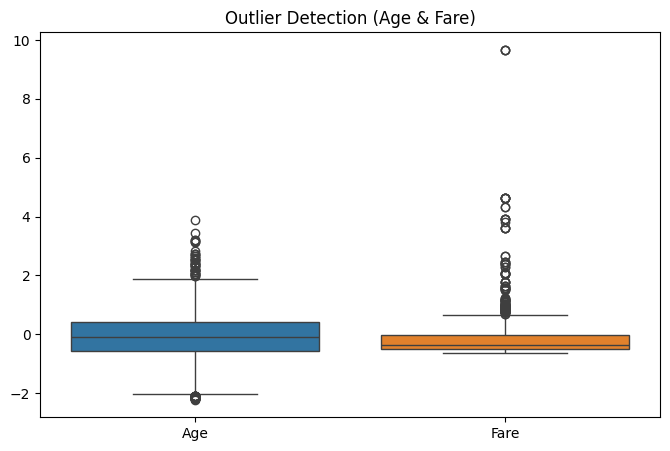


Final dataset shape: (775, 10)
Cleaned dataset saved as titanic_cleaned.csv


In [ ]:
# Task 1: Data Cleaning & Preprocessing
# Titanic Dataset Example

# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Load dataset (Titanic dataset from Kaggle)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview dataset
print("First 5 rows:")
print(df.head())

# Step 1: Explore basic info
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 2: Handle missing values
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many nulls)
df.drop(columns=['Cabin'], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Step 3: Handle categorical variables
# One-hot encode Embarked and Sex
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Drop irrelevant columns
df.drop(columns=['Name', 'Ticket'], inplace=True)

print("\nData after encoding:")
print(df.head())

# Step 4: Feature scaling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 5: Outlier detection (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Age','Fare']])
plt.title("Outlier Detection (Age & Fare)")
plt.show()

# Optionally remove outliers (example: keep within 1.5*IQR)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]

print("\nFinal dataset shape:", df.shape)

# Save cleaned dataset
df.to_csv("titanic_cleaned.csv", index=False)
print("Cleaned dataset saved as titanic_cleaned.csv")
